## Project 1 - Introduction to Data Science 
## Writting A Medium Blog Post 
### About The Data: 
In this project we are analysing two data sets from Airbnb about Seattle listing properties on the apps. These data sets contain multiple variables that gives understanding of the properties feature and prices and availabilities. 

### First Step

<b>Understanding the business</b>. In this section we will try to understand the business by looking the what the objectives of the project could be and what are the values that we can bring to both consumers and suppliers. 

Looking at the data there are a few questions that might be answered from it which will bring valuable insights to both homeowners and travellers. 

### Questions: 
1- What is the average price / availability distribution over the year? 

2- What is the most rented type of unites? 

3- On average, where are the locations of the most rented units?

4- what are the features of the most rented units? 

### Second Step
<b>Understand the data</b>. In this step I will perform Exploretory Data Analysis and then identify the datasts and variables we need to answer our questions. 

#### Import libraries and Datasets
To answer our questions we need to Import the following datasets: 

1- Calendar, including listing id and the price and availability for that day

2- Listings, including full descriptions and average review score


In [372]:
## Importing Neccessory Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

## Importing Airbnb Seattle datasets which can provide answers to our questions
df_calendar = pd.read_csv('calendar.csv')
df_listings = pd.read_csv('listings.csv')

#### Perform EDA on Calendar Dataframe 

In [373]:
## View Calander Dataframe 
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [374]:
## Output information about Calendar dataset and its variables
print(df_calendar.shape)
df_calendar.info()

(1393570, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [375]:
## Find out the number of missing values in all variables
## All missing values on this data set can not be dropped without keeping in mind that we will lose information about the availability of the unit
listings_null_values = df_calendar.isna().sum()
pd.set_option('display.max_rows', None)
listings_null_values

listing_id         0
date               0
available          0
price         459028
dtype: int64

#### Observations: 
One note about the df_calendar dataset is that whenever there is an NA values on the price column, it means the property is not available at that given date.
This means that if we drop NA values from price column we will lose a valuable information which is the availability of the property. 
However, at the same time we will face issues with detecting and removing outliers from price column because we will need to remove NA values first.
We will solve this by conducting our analysis on availability first, then moving to analyze the price column. 


In [376]:
## Inorder to find the distribution of price we first need to convert it to float instead of object
## Step one removing $ and ,  
df_calendar['price'] = df_calendar['price'].str.replace('$', '')
df_calendar['price'] = df_calendar['price'].str.replace(',', '')
df_calendar['price'] = df_calendar['price'].astype(float)

/var/folders/lv/2pgnx84x1fb2r0wwf3sbmb2r0000gn/T/ipykernel_53947/2976678168.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_calendar['price'] = df_calendar['price'].str.replace('$', '')


In [377]:
## Show the maximum number and the minimum number
print(df_calendar['price'].max())
print(df_calendar['price'].min())

1650.0
10.0


<Axes: >

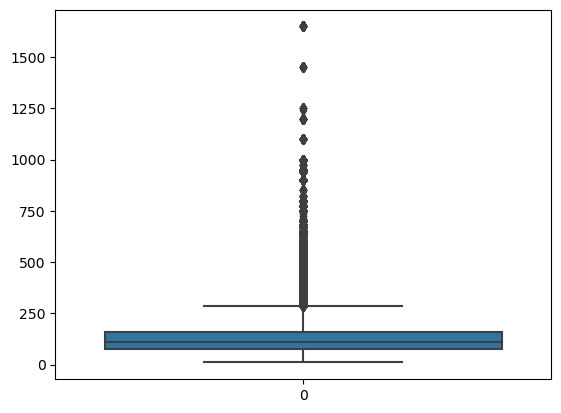

In [378]:
## examining the distrubution for proces using boxplot
## here we can see that the data is skewed and can not give a real representation of what is really hapening with prices
## but again we are forced to keep it to measure availability first. 
sns.boxplot(df_calendar['price'])

##### Now, We will transform and analyze the data to answer the folowing questions: 
- What is the monthly average number of available properties? 
- What is the monthly price per night average of properties? 


In [379]:
## To answer the first question we need to number the available column so that available units is 1 and unavailable unit is 0
## Then, we need to create a column that has the name of each month 
## Finally we group by the month and plot the average of the avalability. 

## Transformation of df_calendar: add a month column and convert available to a numeric column 
df_calendar['Month'] = pd.to_datetime(df_calendar['date']).dt.month_name()
df_calendar['Year'] = pd.to_datetime(df_calendar['date']).dt.to_period('Y')
df_calendar['available'].replace({'t':1,'f':0},inplace=True)
## removing the 2017 year because it has only afew days of the first month.
df_calendar = df_calendar.drop(df_calendar[df_calendar['Year'] == 2017].index) 
df_calendar.head()

,listing_id,date,available,price,Month,Year
0,241032,2016-01-04,1,85.0,January,2016
1,241032,2016-01-05,1,85.0,January,2016
2,241032,2016-01-06,0,NaN,January,2016
3,241032,2016-01-07,0,NaN,January,2016
4,241032,2016-01-08,0,NaN,January,2016


In [382]:
## In order to answer our first question we need to create a new datast called avg_cal which have the average calculation of both available columns. 
## We also want to sort the months from January to December 

availability_avg = pd.DataFrame(df_calendar.groupby(['Month'])[['available']].mean())

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
## make index as first column
availability_avg = availability_avg.reset_index()
## Sorting by months
availability_avg['Month'] = pd.Categorical(availability_avg['Month'], categories=months, ordered=True)
availability_avg.sort_values(by='Month',inplace=True)

availability_avg


,Month,available
4,January,0.566937
3,February,0.662208
7,March,0.709187
0,April,0.663847
8,May,0.675670
6,June,0.674384
5,July,0.627097
1,August,0.645051
11,September,0.674402
10,October,0.696514


In [383]:
availability_avg.shape

(12, 2)

/var/folders/lv/2pgnx84x1fb2r0wwf3sbmb2r0000gn/T/ipykernel_53947/899855147.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(availability_avg.Month, rotation=90)


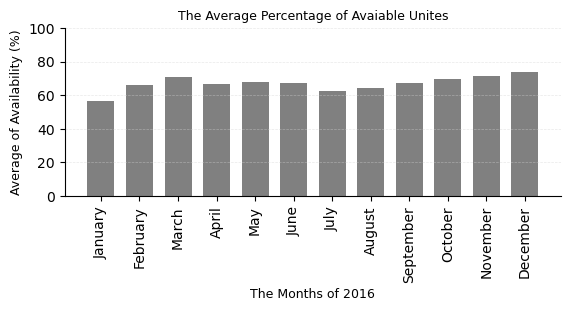

In [440]:
## creating the bar plot for the average cost and the average availability side by side
## Keep in mind that the average price calculation in this plot is disregarding the outliers in the column 

width = 0.7
ax2 = plt.subplot(2,1,1) ## for multible subplot or changing the location of the figure. we can use plt.figure() for a complete figure 
ax2.bar(availability_avg.Month,availability_avg.available*100, color='grey', width=width)
ax2.set_ylim(0,100)
ax2.set_xticklabels(availability_avg.Month, rotation=90)
ax2.set_title("The Average Percentage of Avaiable Unites", fontsize = 9)
ax2.set_xlabel("The Months of 2016", fontsize = 9)
ax2.set_ylabel("Average of Availability (%)", fontsize = 9)
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.grid(True, axis = 'y',  color='lightgray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

#### Now, we want to replot the price column bu after drop NA Values and remove all outliers

In [385]:
## Since the distributions is skewed, we will use IQR to remove outliers from a new data frame that has no na values for prices
price_df = df_calendar.dropna() ## to remove outliers we had to drop nan values !! is there another way 
Q1 = np.percentile(price_df['price'], 25, method='midpoint')
Q3 = np.percentile(price_df['price'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

85.0


(868542, 6)


<Axes: >

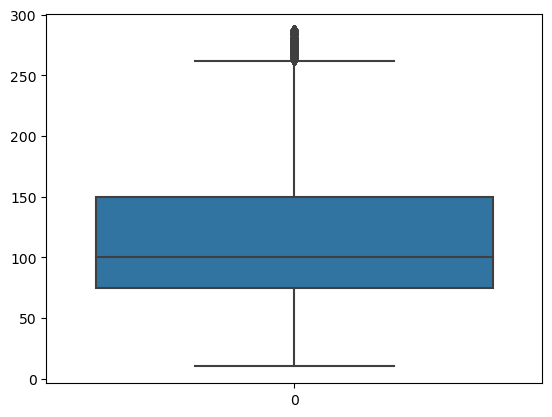

In [386]:
upper = Q3+1.5*IQR
lower = Q1 - 1.5*IQR
upper_array = np.where(price_df['price'] >= upper)[0]
lower_array = np.where(price_df['price'] <= lower)[0]
price_df = Available_units.loc[(price_df['price'] >= lower) & (price_df['price'] <= upper)]
print(price_df.shape)
## Show distribution 
sns.boxplot(price_df['price'])

In [387]:
price_df.head()

,listing_id,date,available,price,Month,Year
0,241032,2016-01-04,1,85.0,January,2016
1,241032,2016-01-05,1,85.0,January,2016
9,241032,2016-01-13,1,85.0,January,2016
10,241032,2016-01-14,1,85.0,January,2016
14,241032,2016-01-18,1,85.0,January,2016


/var/folders/lv/2pgnx84x1fb2r0wwf3sbmb2r0000gn/T/ipykernel_53947/1823313613.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(avg_cal.Month, rotation=90)


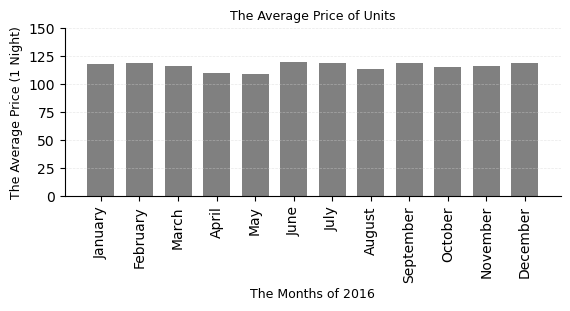

In [432]:
avg_price = pd.DataFrame(price_df.groupby(['Month'])[['price']].mean())
avg_price = avg_price.reset_index()
avg_price['Month'] = pd.Categorical(avg_cal['Month'], categories=months, ordered=True)
avg_price.sort_values(by='Month',inplace=True)
fig = plt.figure() # Create matplotlib figure
width = 0.7
ax1 = plt.subplot(2,1,1)
plt.bar(avg_price.Month,avg_price.price, color='grey', width=width)
ax1.set_title("The Average Price of Units", fontsize = 9)
ax1.set_ylim(0,150)
ax1.set_xlabel("The Months of 2016", fontsize = 9)
ax1.set_ylabel("The Average Price (1 Night)",fontsize=9)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.grid(True, axis = 'y',  color='lightgray', linestyle='--', linewidth=0.5, alpha=0.5)
ax1.set_xticklabels(avg_cal.Month, rotation=90)
plt.show()

#### Now, We start to look at the second data set 

In listing_df we can aswer questions like:
- On average, where are the locations of the most rented units?

- What are the features of the most rented units? 

However, in order to now the most rented properties, we must join the two data sets. 

In [390]:
## View listings dataframe and showing all columns
pd.set_option('display.max_columns', None)
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

In [391]:
## Output information about listings dataset and its variables
print(df_listings.shape)
df_listings.info()

(3818, 92)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 


In [392]:
## Transformation
## choose columns - since we are interested on a few variables that might have the greatest impact on the property, we chose the following
listing_df_new = df_listings[['id','price','neighbourhood_group_cleansed','property_type','room_type','has_availability','cancellation_policy','bedrooms','review_scores_rating']]
print(listing_df_new.shape)
listing_df_new.head(10)

(3818, 9)


,id,price,neighbourhood_group_cleansed,property_type,room_type,has_availability,cancellation_policy,bedrooms,review_scores_rating
0,241032,$85.00,Queen Anne,Apartment,Entire home/apt,t,moderate,1.0,95.0
1,953595,$150.00,Queen Anne,Apartment,Entire home/apt,t,strict,1.0,96.0
2,3308979,$975.00,Queen Anne,House,Entire home/apt,t,strict,5.0,97.0
3,7421966,$100.00,Queen Anne,Apartment,Entire home/apt,t,flexible,0.0,NaN
4,278830,$450.00,Queen Anne,House,Entire home/apt,t,strict,3.0,92.0
5,5956968,$120.00,Queen Anne,House,Private room,t,strict,1.0,95.0
6,1909058,$80.00,Queen Anne,House,Private room,t,moderate,1.0,99.0
7,856550,$60.00,Queen Anne,Cabin,Private room,t,strict,1.0,97.0
8,4948745,$90.00,Queen Anne,Apartment,Private room,t,strict,1.0,97.0
9,2493658,$150.00,Queen Anne,Apartment,Entire home/apt,t,strict,1.0,97.0


In [393]:
## Find out the number of missing values in all variables 
listings_null_values = listing_df_new.isna().sum()
pd.set_option('display.max_rows', None)
listings_null_values

id                                0
price                             0
neighbourhood_group_cleansed      0
property_type                     1
room_type                         0
has_availability                  0
cancellation_policy               0
bedrooms                          6
review_scores_rating            647
dtype: int64

In [394]:
## create new data frame from df_calendar that is grouped by id and months and calculate the avg of price and the average of availability 
## this data set will be used to join both data (df_calendar & listing_df).
merging_df = pd.DataFrame(df_calendar.groupby(['Month', 'listing_id'])[['available','price']].mean())
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
merging_df = merging_df.reset_index()
merging_df['Month'] = pd.Categorical(merging_df['Month'], categories=months, ordered=True)
merging_df.sort_values(by='Month',inplace=True)
merging_df.head(10)

,Month,listing_id,available,price
16227,January,3258386,1.000000,90.333333
16551,January,4125779,1.000000,104.333333
16550,January,4122325,0.000000,NaN
16549,January,4121334,0.066667,110.000000
16548,January,4118282,0.500000,111.600000
16547,January,4116645,0.166667,70.000000
16546,January,4111954,0.500000,60.000000
16545,January,4111137,0.700000,85.000000
16544,January,4110396,1.000000,95.000000
16543,January,4106041,1.000000,149.266667


In [395]:
## the shape of this dataframe should equal to 12 * 3818 = 45816
merging_df.shape

(45816, 4)

In [396]:
listings_null_values2 = merging_df.isna().sum()
pd.set_option('display.max_rows', None)
listings_null_values2

Month             0
listing_id        0
available         0
price         11877
dtype: int64

In [398]:
## Now we want to join df_calendar with listing_df_new
merged_df = listing_df_new.merge(merging_df, how = 'inner', left_on = 'id', right_on = 'listing_id')
merged_df.head()


,id,price_x,neighbourhood_group_cleansed,property_type,room_type,has_availability,cancellation_policy,bedrooms,review_scores_rating,Month,listing_id,available,price_y
0,241032,$85.00,Queen Anne,Apartment,Entire home/apt,t,moderate,1.0,95.0,January,241032,0.466667,85.0
1,241032,$85.00,Queen Anne,Apartment,Entire home/apt,t,moderate,1.0,95.0,February,241032,0.896552,85.0
2,241032,$85.00,Queen Anne,Apartment,Entire home/apt,t,moderate,1.0,95.0,March,241032,1.000000,85.0
3,241032,$85.00,Queen Anne,Apartment,Entire home/apt,t,moderate,1.0,95.0,April,241032,1.000000,85.0
4,241032,$85.00,Queen Anne,Apartment,Entire home/apt,t,moderate,1.0,95.0,May,241032,1.000000,85.0


In [399]:
merged_df.shape

(45816, 13)

In [400]:
## reshaping and adjusting the dataset 
merged_df.drop(['price_x','has_availability','listing_id'], axis = 1, inplace=True)
merged_df.head()

,id,neighbourhood_group_cleansed,property_type,room_type,cancellation_policy,bedrooms,review_scores_rating,Month,available,price_y
0,241032,Queen Anne,Apartment,Entire home/apt,moderate,1.0,95.0,January,0.466667,85.0
1,241032,Queen Anne,Apartment,Entire home/apt,moderate,1.0,95.0,February,0.896552,85.0
2,241032,Queen Anne,Apartment,Entire home/apt,moderate,1.0,95.0,March,1.000000,85.0
3,241032,Queen Anne,Apartment,Entire home/apt,moderate,1.0,95.0,April,1.000000,85.0
4,241032,Queen Anne,Apartment,Entire home/apt,moderate,1.0,95.0,May,1.000000,85.0


In [401]:
## Creating better naming for columns of the data set 
merged_df.rename(columns = {'neighbourhood_group_cleansed':'neighbourhood_name', 'bedrooms': 'bedrooms_number','available':'availability_avg', 'price_y':'Average_price_per_night'}, inplace=True)
merged_df.head()

,id,neighbourhood_name,property_type,room_type,cancellation_policy,bedrooms_number,review_scores_rating,Month,availability_avg,Average_price_per_night
0,241032,Queen Anne,Apartment,Entire home/apt,moderate,1.0,95.0,January,0.466667,85.0
1,241032,Queen Anne,Apartment,Entire home/apt,moderate,1.0,95.0,February,0.896552,85.0
2,241032,Queen Anne,Apartment,Entire home/apt,moderate,1.0,95.0,March,1.000000,85.0
3,241032,Queen Anne,Apartment,Entire home/apt,moderate,1.0,95.0,April,1.000000,85.0
4,241032,Queen Anne,Apartment,Entire home/apt,moderate,1.0,95.0,May,1.000000,85.0


#### Merged_df dataframe will be the main dataset that I will perform analysis on. 

In [402]:
# most rented units df - 
neighbourhood_availability_dist = pd.DataFrame(merged_df.groupby(['neighbourhood_name'])['availability_avg'].mean())
neighbourhood_availability_dist = neighbourhood_availability_dist.reset_index()
neighbourhood_availability_dist

,neighbourhood_name,availability_avg
0,Ballard,0.691712
1,Beacon Hill,0.702604
2,Capitol Hill,0.640838
3,Cascade,0.575916
4,Central Area,0.672039
5,Delridge,0.747063
6,Downtown,0.650057
7,Interbay,0.845493
8,Lake City,0.768579
9,Magnolia,0.774705


/var/folders/lv/2pgnx84x1fb2r0wwf3sbmb2r0000gn/T/ipykernel_53947/1295381235.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(neighbourhood_availability_dist.neighbourhood_name, rotation=90)


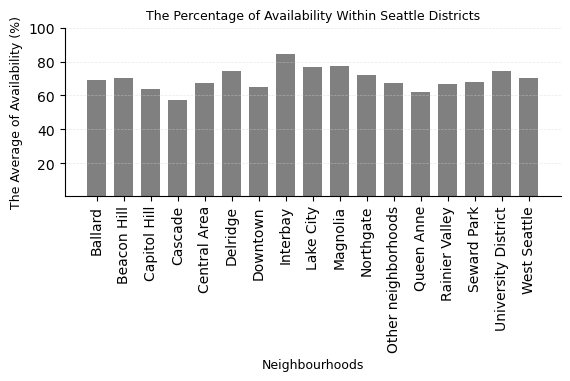

In [433]:
## neighbourhood_availability_dist.sort_values(by=['availability_avg'],ascending=True, inplace = True) -- (No Need To Sort)
fig = plt.figure() # Create matplotlib figure
width = 0.7
ax1 = plt.subplot(2,1,1)
plt.bar(neighbourhood_availability_dist.neighbourhood_name,neighbourhood_availability_dist.availability_avg*100, color='grey', width=width)
ax1.set_xticklabels(neighbourhood_availability_dist.neighbourhood_name, rotation=90)
ax1.set_ylim(1,100)
ax1.set_xlabel("Neighbourhoods", fontsize = 9)
ax1.set_ylabel("The Average of Availability (%)", fontsize = 9)
ax1.set_title("The Percentage of Availability Within Seattle Districts", fontsize = 9)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.grid(True, axis = 'y',  color='lightgray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

<Axes: >

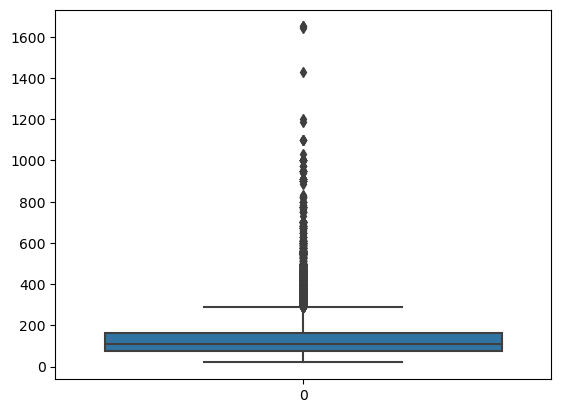

In [404]:
## Before ploting for the average price per neighbourhood we first need to deal with outliers 
sns.boxplot(merged_df['Average_price_per_night'])

In [405]:
## remove outliers but first plot availability because df_calendar prices are missing when the unit is rented 
merged_df = merged_df.dropna() ## to remove outliers we had to drop nan values !! is there another way 
Q1 = np.percentile(merged_df['Average_price_per_night'], 25, method='midpoint')
Q3 = np.percentile(merged_df['Average_price_per_night'], 75, method='midpoint')
IQR = Q3 - Q1
print(IQR)

85.0


(26695, 10)


<Axes: >

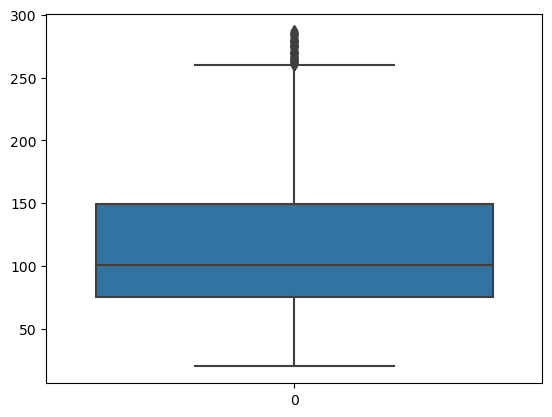

In [406]:
## remove outliers 
upper = Q3+1.5*IQR
lower = Q1 - 1.5*IQR
upper_array = np.where(merged_df['Average_price_per_night'] >= upper)[0]
lower_array = np.where(merged_df['Average_price_per_night'] <= lower)[0]
merged_df = merged_df.loc[(merged_df['Average_price_per_night'] >= lower) & (merged_df['Average_price_per_night'] <= upper)]
print(merged_df.shape)
## Show distribution 
sns.boxplot(merged_df['Average_price_per_night'])

In [407]:
## price distribution across neighbourhoods 
neighbourhood_price_dist = pd.DataFrame(merged_df.groupby(['neighbourhood_name'])['Average_price_per_night'].mean())
neighbourhood_price_dist = neighbourhood_price_dist.reset_index()
neighbourhood_price_dist

,neighbourhood_name,Average_price_per_night
0,Ballard,105.044588
1,Beacon Hill,89.260832
2,Capitol Hill,117.837220
3,Cascade,118.098213
4,Central Area,114.527080
5,Delridge,87.676086
6,Downtown,156.300566
7,Interbay,100.014592
8,Lake City,92.293063
9,Magnolia,146.681376


/var/folders/lv/2pgnx84x1fb2r0wwf3sbmb2r0000gn/T/ipykernel_53947/1339345844.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(neighbourhood_price_dist.neighbourhood_name, rotation=90)


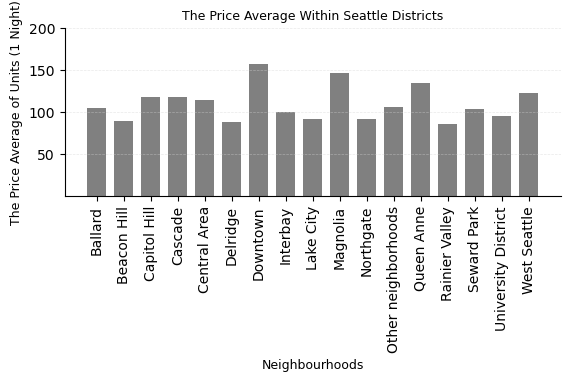

In [434]:
##plots 
## neighbourhood_price_dist.sort_values(by=['Average_price_per_night'],ascending=True, inplace = True) -- (No Need To Sort)
fig = plt.figure() # Create matplotlib figure
width = 0.7
ax1 = plt.subplot(2,1,1)
plt.bar(neighbourhood_price_dist.neighbourhood_name,neighbourhood_price_dist.Average_price_per_night, color='grey', width=width)
ax1.set_ylim(1,200)
ax1.set_xlabel("Neighbourhoods", fontsize = 9)
ax1.set_ylabel("The Price Average of Units (1 Night)", fontsize = 9)
ax1.set_title("The Price Average Within Seattle Districts", fontsize = 9)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.grid(True, axis = 'y',  color='lightgray', linestyle='--', linewidth=0.5, alpha=0.5)
ax1.set_xticklabels(neighbourhood_price_dist.neighbourhood_name, rotation=90)
plt.show()

In [409]:
## Most rented units across all neighbourhoods -- analyze their charactristics 
## Find the top Most rented units (i.e. has availability average below 50%) and plot their characterestics
## Transformation
most_rented = pd.DataFrame(merged_df.groupby(['id'])['availability_avg'].mean())
most_rented.sort_values(by=['availability_avg'],ascending=True, inplace = True)
most_rented = most_rented.reset_index()
most_rented = most_rented.head(191) ## Is it rented or is it out of the market????????????? Assuming it is not off the market.
most_rented.head()

,id,availability_avg
0,656909,0.033333
1,3819831,0.033333
2,9714078,0.034483
3,5041669,0.049462
4,6187340,0.050000


In [410]:
## This set of data has the id numbers of units that has the lowest availability average per month (below 50 percent)
most_rented_units_df = merged_df[merged_df.id.isin(most_rented.id.unique())]
most_rented_units_df.head(10)

,id,neighbourhood_name,property_type,room_type,cancellation_policy,bedrooms_number,review_scores_rating,Month,availability_avg,Average_price_per_night
396,5021081,Queen Anne,House,Entire home/apt,strict,4.0,75.0,January,0.066667,222.000000
780,7077910,Ballard,House,Entire home/apt,strict,3.0,91.0,January,0.766667,141.565217
781,7077910,Ballard,House,Entire home/apt,strict,3.0,91.0,February,0.137931,141.000000
1128,6590264,Ballard,Apartment,Entire home/apt,strict,1.0,96.0,January,0.933333,100.000000
1129,6590264,Ballard,Apartment,Entire home/apt,strict,1.0,96.0,February,0.724138,100.000000
1130,6590264,Ballard,Apartment,Entire home/apt,strict,1.0,96.0,March,0.193548,115.000000
1131,6590264,Ballard,Apartment,Entire home/apt,strict,1.0,96.0,April,0.033333,115.000000
1356,7134759,Ballard,Townhouse,Private room,moderate,1.0,98.0,January,0.433333,40.846154
1357,7134759,Ballard,Townhouse,Private room,moderate,1.0,98.0,February,0.931034,47.629630
1358,7134759,Ballard,Townhouse,Private room,moderate,1.0,98.0,March,0.161290,48.600000


In [411]:
most_rented_units_df.shape

(536, 10)

In [412]:
##Transform 1: create a data frame to show the reate distribution of the most rented properties in Seattle and how are they rated
rate_dist = pd.DataFrame(most_rented_units_df.groupby(['id'])['review_scores_rating'].mean())
rate_dist = rate_dist.reset_index()
rate_dist.head(10)

,id,review_scores_rating
0,7369,94.0
1,9460,98.0
2,107962,97.0
3,182716,99.0
4,189156,96.0
5,193371,97.0
6,317248,100.0
7,451012,98.0
8,458183,91.0
9,458186,95.0


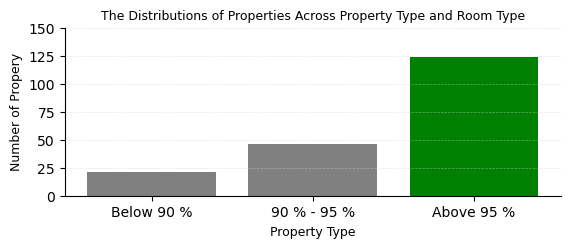

In [435]:
## Plotting 
## Define conditions
condition_1 = rate_dist['review_scores_rating'] < 90
condition_2 = (rate_dist['review_scores_rating'] >= 90) & (rate_dist['review_scores_rating'] <= 95)
condition_3 = rate_dist['review_scores_rating'] > 95

# Create subsets based on conditions
subset_1 = rate_dist[condition_1]
subset_2 = rate_dist[condition_2]
subset_3 = rate_dist[condition_3]

# Count values in each subset
counts = [len(subset_1), len(subset_2), len(subset_3)]

# Plotting
colors = ['grey', 'grey', 'green']
ax1 = plt.subplot(2,1,1)
plt.bar(['Below 90 %', '90 % - 95 %', 'Above 95 %'], counts, color = colors)

# Adding labels and title
# Set the tick labels with rotation
ax1.set_ylim(0,150)
ax1.set_xlabel("Property Type", fontsize = 9)
ax1.set_ylabel("Number of Propery", fontsize = 9)
ax1.set_title("The Distributions of Properties Across Property Type and Room Type", fontsize = 9)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.grid(True, axis = 'y',  color='lightgray', linestyle='--', linewidth=0.5, alpha=0.5)


plt.show()

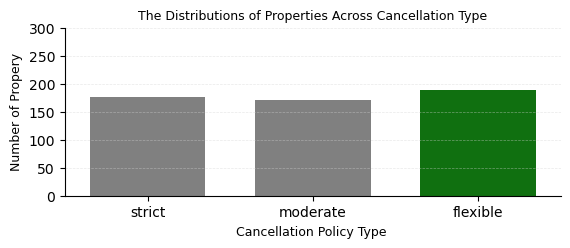

In [436]:
##Plot 2: 
fig = plt.figure() # Create matplotlib figure
width = 0.7
ax1 = plt.subplot(2,1,1)
colors = ['grey', 'grey', 'green']
sns.countplot(most_rented_units_df, x = 'cancellation_policy', width = width, palette = colors)

ax1.set_ylim(0,300)
ax1.set_xlabel("Cancellation Policy Type ", fontsize = 9)
ax1.set_ylabel("Number of Propery", fontsize = 9)
ax1.set_title("The Distributions of Properties Across Cancellation Type", fontsize = 9)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.grid(True, axis = 'y',  color='lightgray', linestyle='--', linewidth=0.5, alpha=0.5)

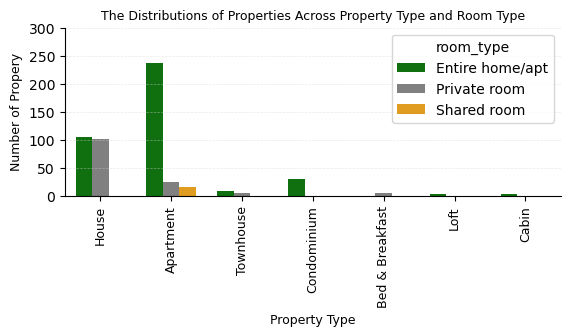

In [437]:
# Save labels of the x axis to be able to rotate it latar on 
labels = most_rented_units_df.property_type.unique()

fig = plt.figure() # Create matplotlib figure
width = 0.7
ax1 = plt.subplot(2,1,1)

# plotting
colors = ['green', 'grey', 'orange', 'red']
sns.countplot(most_rented_units_df, x = 'property_type', hue = 'room_type', width = width, palette = colors)
# Set the tick locations
ax1.set_xticks(range(len(labels)))

ax1.set_ylim(0,300)
ax1.set_xlabel("Property Type", fontsize = 9)
ax1.set_ylabel("Number of Propery", fontsize = 9)
ax1.set_title("The Distributions of Properties Across Property Type and Room Type", fontsize = 9)
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)

# Set the tick labels with rotation
ax1.set_xticklabels(labels, rotation=90, fontsize=9)
ax1.grid(True, axis = 'y',  color='lightgray', linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

# ----------------------------------------THE END---------------------------------------